#HACKATHON-DEEP NEURAL NETWORK

In [4]:
#INSTALLING NEUROLAB
!pip install neurolab

In [5]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neurolab as nl
import tensorflow as tf
import keras

### TASK 1

In [6]:
#LOADING DATASET
house_df=pd.read_csv('DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv')
print(house_df.shape)
house_df.head(2)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
#EXTENDING THE DATA BY ADDING NEW COLUMN AgeWhenSold
house_df['AgeWhenSold']=house_df['YrSold']-house_df['YearBuilt']
print(house_df.shape)
house_df.head(2)

(1460, 82)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31


In [8]:
#GETTING ALL COLUMN NAMES
house_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
#REMOVING ALL THE CASES WHERE LotArea>40,000 and GrLivArea>2600
house_df1=house_df[(house_df.LotArea<=40,000)and(house_df.GrLivArea<=2600)]
print(house_df1.shape)
house_df1.head(2)

(1407, 82)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhenSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31


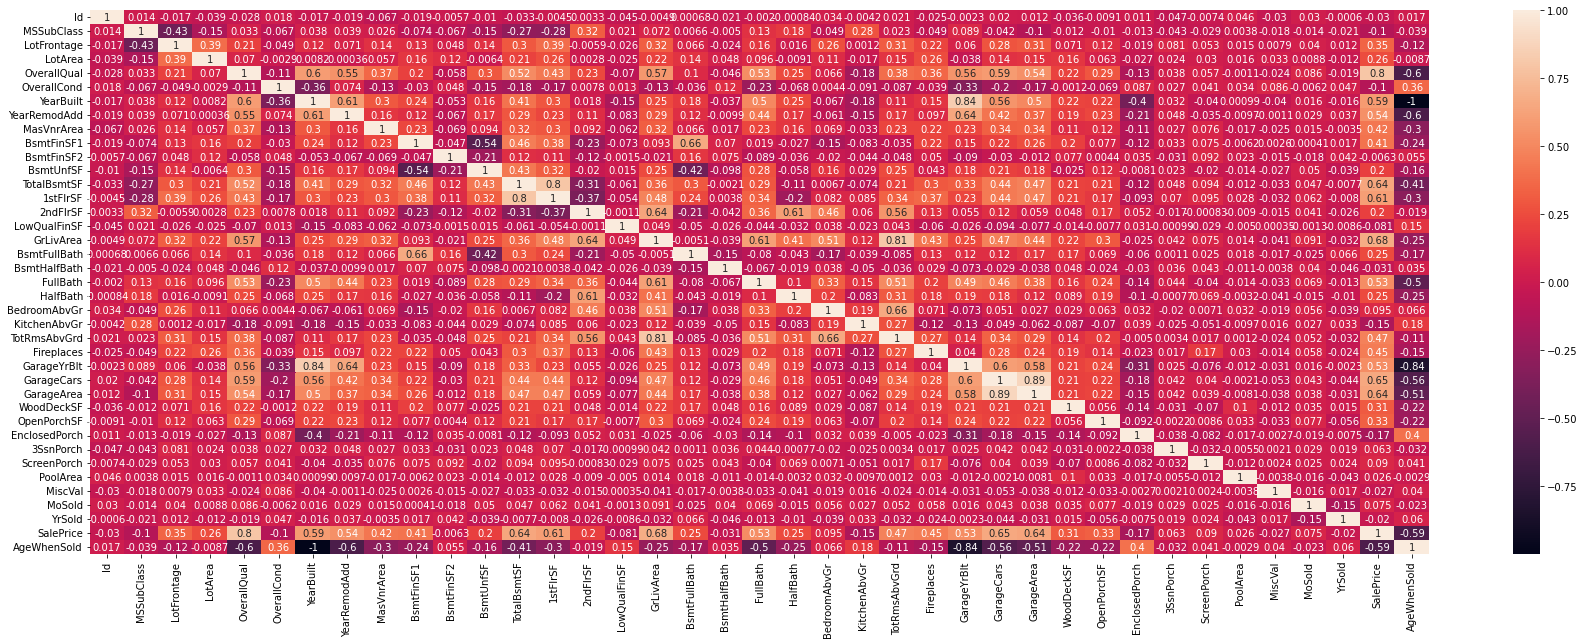

In [10]:
#CORRELATION
plt.figure(figsize=(30,10))
sns.heatmap(house_df1.corr(),annot=True)
plt.show()

In [11]:
house_df2=pd.get_dummies(house_df1)
print(house_df2.shape)
house_df2.head(2)

(1407, 286)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0


In [12]:
#DATA NORMALIZATION
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
house_df3=scaler.fit_transform(house_df2)
house_df3=pd.DataFrame(house_df3,columns=house_df2.columns)
house_df3=house_df3.dropna()
print(house_df3.shape)
house_df3.head(2)

(1079, 286)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.1225,0.322669,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000685,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.0000,0.446984,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##CHALLENGE 1-ONE DIMENSIONAL REGRESSION WITH ONE LAYER NETWORK
###TASK 2
GrLivArea has 0.68 correlation with SalePrice

In [13]:
#Separate dataset into dependent and independent variables
X = house_df3[['GrLivArea']]
y = house_df3[['SalePrice']]
X.shape,y.shape

((1079, 1), (1079, 1))

In [14]:
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=42)
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((863, 1), (216, 1), (863, 1), (216, 1))

In [15]:
#MODEL 1
tf.random.set_seed(42)
model1=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape =[1])])
#COMPILE THE MODEL
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history1=model1.fit(X1_train,y1_train,epochs=100,verbose=0)

In [16]:
# FUNCTION FOR PLOTTING LEARNING CURVE 
def learning_curve(history1):
    pd.DataFrame(history1.history['loss']).plot()
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()

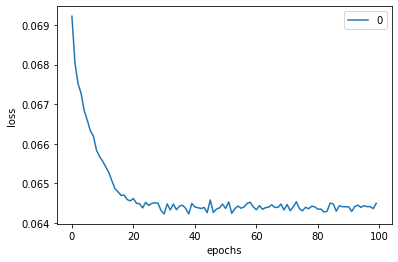

In [17]:
#PLOTTING LEARNING CURVE
learning_curve(history1)

In [18]:
#PREDICTIONS AND EVALUATION FOR THE MODEL1
y_pred=model1.predict(X1_test)
model1_loss,model1_accuracy=model1.evaluate(X1_test,y1_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.0000e+00


In [19]:
#FUNCTION FOR PLOTTING PREDICTIONS
def plot_predictions(test_data=X1_test,test_labels=y1_test,predictions=y_pred):
  plt.scatter(test_data,test_labels,c='b',s=20,label='Test data')
  plt.scatter(test_data,predictions,c='g',label='Predictions')
  plt.title('TEST DATA VS PREDICTIONS')
  plt.legend()
  plt.show()

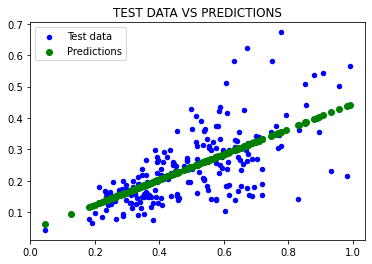

In [20]:
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X1_test,y1_test,y_pred)

TRYING TEST DATA WITH 30% AND RANDOM_STATE AS 0 FOR **MODEL 2**

In [21]:
#Splitting the dataset into train and test
X2_train,X2_test,y2_train,y2_test=train_test_split(X,y,test_size=0.3,random_state=0)
X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape

((755, 1), (324, 1), (755, 1), (324, 1))

In [22]:
#MODEL 2
tf.random.set_seed(42)
model2=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape =[1])])
#COMPILE THE MODEL
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history2=model2.fit(X2_train,y2_train,epochs=100,verbose=0)

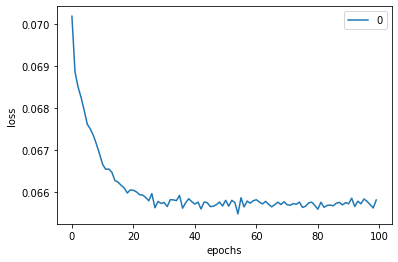

In [23]:
#PLOTTING LEARNING CURVE
learning_curve(history2)

In [24]:
#PREDICTIONS AND EVALUATION FOR THE MODEL2
y_pred1=model2.predict(X2_test)
model2_loss,model2_accuracy=model2.evaluate(X2_test,y2_test)

11/11 [==============================] - 1s 7ms/step - loss: 0.0577 - accuracy: 0.0000e+00


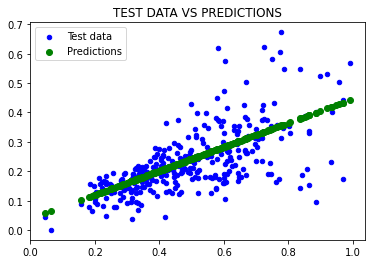

In [25]:
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X2_test,y2_test,y_pred1)

TRYING TEST DATA WITH 25% AND RANDOM_STATE AS 4 FOR **MODEL 3**

In [26]:
#Splitting the dataset into train and test
X3_train,X3_test,y3_train,y3_test=train_test_split(X,y,test_size=0.25,random_state=4)
X3_train.shape,X3_test.shape,y3_train.shape,y3_test.shape

((809, 1), (270, 1), (809, 1), (270, 1))

In [27]:
#MODEL 3
tf.random.set_seed(42)
model3=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape =[1])])
#COMPILE THE MODEL
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history3=model3.fit(X3_train,y3_train,epochs=100,verbose=0)

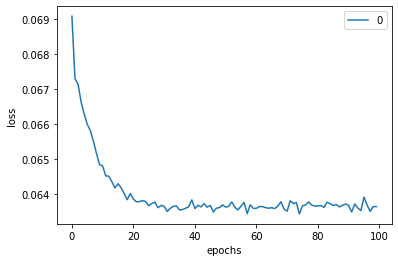

In [28]:
#PLOTTING LEARNING CURVE
learning_curve(history3)

In [29]:
#PREDICTIONS AND EVALUATION FOR THE MODEL3
y_pred2=model3.predict(X3_test)
model3_loss,model3_accuracy=model3.evaluate(X3_test,y3_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.0000e+00


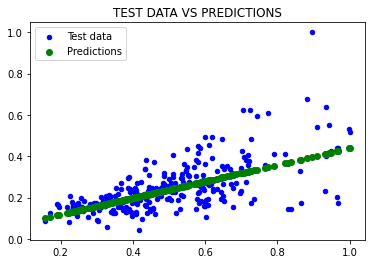

In [30]:
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X3_test,y3_test,y_pred2)

TRYING TEST DATA WITH 10% AND RANDOM_STATE AS 20 FOR MODEL 4

In [31]:
#Splitting the dataset into train and test
X4_train,X4_test,y4_train,y4_test=train_test_split(X,y,test_size=0.10,random_state=20)
X4_train.shape,X4_test.shape,y4_train.shape,y4_test.shape

((971, 1), (108, 1), (971, 1), (108, 1))

In [32]:
#MODEL 4
tf.random.set_seed(42)
model4=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape =[1])])
#COMPILE THE MODEL
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history4=model4.fit(X4_train,y4_train,epochs=100,verbose=0)

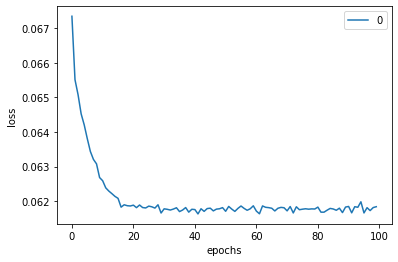

In [33]:
#PLOTTING LEARNING CURVE
learning_curve(history4)

In [34]:
#PREDICTIONS AND EVALUATION FOR THE MODEL4
y_pred3=model4.predict(X4_test)
model4_loss,model4_accuracy=model4.evaluate(X4_test,y4_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.0000e+00


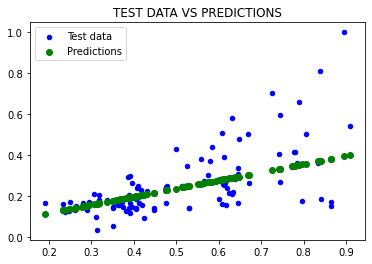

In [35]:
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X4_test,y4_test,y_pred3)

In [36]:
loss=[model1_loss,model2_loss,model3_loss,model4_loss]
accuracy=[model1_accuracy,model2_accuracy,model3_accuracy,model4_accuracy]
model=['Model1','Model2','Model3','Model4']
task2=pd.DataFrame(accuracy,model,columns=['Accuracy'])
task2['Loss']=loss
task2

,Accuracy,Loss
Model1,0.0,0.059327
Model2,0.0,0.057722
Model3,0.0,0.062851
Model4,0.0,0.077811


The accuracy for one Dimensional regression with one layer network is **0** for all the model

##CHALLENGE 2-MULTI DIMENSIONAL REGRESSION WITH ONE LAYER NETWORK
### TASK 3

In [37]:
#Separate dataset into dependent and independent variables
X1 = house_df3[['LotFrontage','GrLivArea','GarageArea','LotArea','AgeWhenSold']]
y1 = house_df3[['SalePrice']]
X1.shape,y1.shape

((1079, 5), (1079, 1))

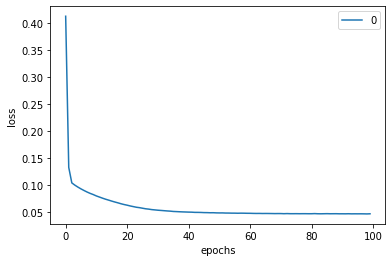

7/7 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.0000e+00


In [38]:
#Splitting the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=42)
#MODEL 5
tf.random.set_seed(42)
model5=tf.keras.Sequential([tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model5.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history5=model5.fit(X1_train,y1_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history5)
#PREDICTIONS AND EVALUATION FOR THE MODEL5
y_pred4=model5.predict(X1_test)
model5_loss,model5_accuracy=model5.evaluate(X1_test,y1_test)

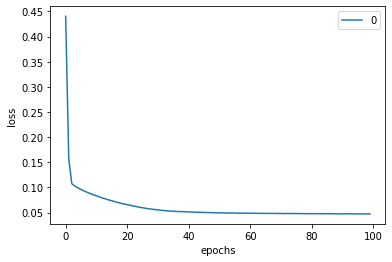

11/11 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.0000e+00


In [39]:
#Splitting the dataset into train and test
X2_train,X2_test,y2_train,y2_test=train_test_split(X1,y1,test_size=0.3,random_state=0)
#MODEL 6
tf.random.set_seed(42)
model6=tf.keras.Sequential([tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model6.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history6=model6.fit(X2_train,y2_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history6)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
y_pred5=model6.predict(X2_test)
model6_loss,model6_accuracy=model6.evaluate(X2_test,y2_test)

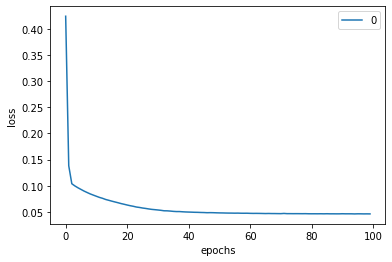

9/9 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.0000e+00


In [40]:
#Splitting the dataset into train and test
X3_train,X3_test,y3_train,y3_test=train_test_split(X1,y1,test_size=0.25,random_state=4)
#MODEL 7
tf.random.set_seed(42)
model7=tf.keras.Sequential([tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model7.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history7=model7.fit(X3_train,y3_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history7)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
y_pred6=model7.predict(X3_test)
model7_loss,model7_accuracy=model7.evaluate(X3_test,y3_test)

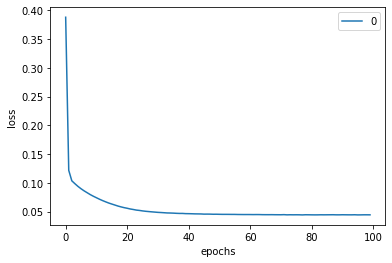

4/4 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.0000e+00


In [41]:
#Splitting the dataset into train and test
X4_train,X4_test,y4_train,y4_test=train_test_split(X1,y1,test_size=0.10,random_state=20)
#MODEL 8
tf.random.set_seed(42)
model8=tf.keras.Sequential([tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model8.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history8=model8.fit(X4_train,y4_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history8)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
y_pred7=model8.predict(X4_test)
model8_loss,model8_accuracy=model8.evaluate(X4_test,y4_test)

In [42]:
loss=[model5_loss,model6_loss,model7_loss,model8_loss]
accuracy=[model5_accuracy,model6_accuracy,model7_accuracy,model8_accuracy]
model=['Model5','Model6','Model7','Model8']
task3=pd.DataFrame(accuracy,model,columns=['Accuracy'])
task3['Loss']=loss
task3

,Accuracy,Loss
Model5,0.0,0.041666
Model6,0.0,0.042544
Model7,0.0,0.044435
Model8,0.0,0.059136


The accuracy for multi Dimensional regression with one layer network is **0** for all the model

##CHALLENGE 3-REGRESSION WITH DEEPER NETWORK
###TASK 4-MULTI LAYER ARCHITECTURE FOR ONE DIMENSIONAL REGRESSION

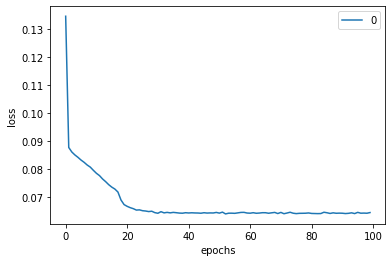

7/7 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.0000e+00


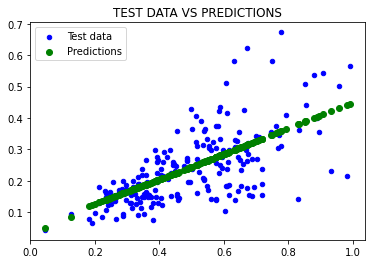

In [43]:
#Splitting the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.20,random_state=42)
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model9=tf.keras.Sequential([tf.keras.layers.Dense(100,input_shape =[1],activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model9.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history9=model9.fit(X1_train,y1_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history9)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
y_pred8=model9.predict(X1_test)
model9_loss,model9_accuracy=model9.evaluate(X1_test,y1_test)
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X1_test,y1_test,y_pred8)

In [44]:
LOSS=model9_loss-model1_loss
print('Loss in challenge 1-1D=',model1_loss,'\tLoss in challenge 3-1D=',model9_loss,'\nDifference in loss=',round(LOSS,4))

Loss in challenge 1-1D= 0.0593273900449276 	Loss in challenge 3-1D= 0.05941537395119667 
Difference in loss= 0.0001


###MULTI LAYER ARCHITECTURE FOR MULTI DIMENSIONAL REGRESSION

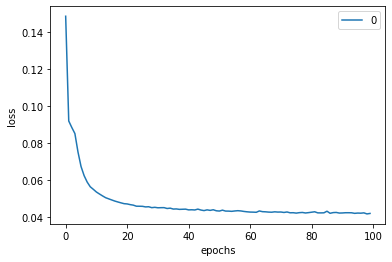

7/7 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.0000e+00


In [45]:
#Splitting the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=42)
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model10=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='relu'),
                            tf.keras.layers.Dense(10,activation='relu'),
                            tf.keras.layers.Dense(1)])
#COMPILE THE MODEL
model10.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
#FIT THE MODEL
history10=model10.fit(X1_train,y1_train,epochs=100,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history10)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
y_pred9=model10.predict(X1_test)
model10_loss,model10_accuracy=model10.evaluate(X1_test,y1_test)

In [46]:
LOSS1=model10_loss-model5_loss
print('Loss in challenge 2-Multi Dim=',model5_loss,'\tLoss in challenge 3-Multi Dim=',model10_loss,'\nDifference in loss=',round(LOSS1,4))

Loss in challenge 2-Multi Dim= 0.04166584461927414 	Loss in challenge 3-Multi Dim= 0.037441328167915344 
Difference in loss= -0.0042


####CONCLUSION:-
**The difference between single and multi dimensional model for single and multi layers architectures does not differ much**

In [47]:
print('\t\t\tLOSS\nOne layer architecture:-\nSingle Dimension=',model1_loss,'\tMulti Dimension=',model5_loss,
      '\nmulti layer architecture:-\nSingle Dimension=',model9_loss,'\tMulti Dimension=',model10_loss)

			LOSS
One layer architecture:-
Single Dimension= 0.0593273900449276 	Multi Dimension= 0.04166584461927414 
multi layer architecture:-
Single Dimension= 0.05941537395119667 	Multi Dimension= 0.037441328167915344


**Model 10** [Multi layer architecture-Multi dimensional]  has less Loss while comparing with other 3 models

##CHALLENGE 4-BINARY CLASSIFICATION
###TASK 5

In [48]:
house_df4=house_df2.copy()
house_df4=house_df4[['FullBath']]
house_df4.loc[house_df4['FullBath']<2]=0;house_df4.loc[house_df4['FullBath']>=2]=1
house_df4['GrLivArea']=house_df2['GrLivArea']
house_df4.head(2)

,FullBath,GrLivArea
0,1,1710
1,1,1262


In [49]:
#DATA NORMALIZATION
house_df4=scaler.fit_transform(house_df4)
house_df4=pd.DataFrame(house_df4,columns=['FullBath','GrLivArea'])
print(house_df4.shape)
house_df4.head(2)

(1407, 2)


,FullBath,GrLivArea
0,1.0,0.607506
1,1.0,0.409713


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


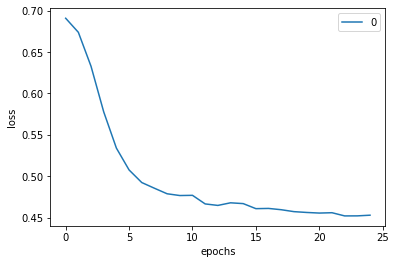

9/9 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7908


In [50]:
#Separate dataset into dependent and independent variables
X = house_df4[['GrLivArea']]
y = house_df4[['FullBath']]
#Splitting the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=42)
#SET THE RANDOM SEED
tf.random.set_seed(42)
#CREATE THE MODEL
model11=tf.keras.Sequential([tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(4,activation='relu'),
                            tf.keras.layers.Dense(1,activation='sigmoid')])
#COMPILE THE MODEL
model11.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
#FIT THE COMPILED MODEL
history11=model11.fit(X1_train,y1_train,epochs=25,verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history11)
#PREDICTIONS AND EVALUATION FOR THE MODEL6
Y_pred=model11.predict(X1_test)
model11_loss,model11_accuracy=model11.evaluate(X1_test,y1_test)

The accuracy for MODEL 11 is 80%

In [51]:
index=np.where(Y_pred >=0.9);index=index[0]
data1=[]
for i in index:
  data1.append(house_df2['GrLivArea'].iloc[i])
data1=np.array(data1)
data2=Y_pred[index]

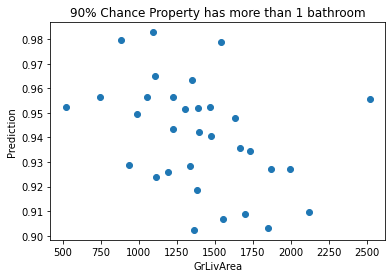

In [52]:
plt.scatter(data1,data2)
plt.title('90% Chance Property has more than 1 bathroom')
plt.xlabel('GrLivArea');plt.ylabel('Prediction')
plt.show()

In [53]:
#CREATING CONFUSION MATRIX 
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test,tf.round(Y_pred))

array([[109,  29],
       [ 30, 114]])

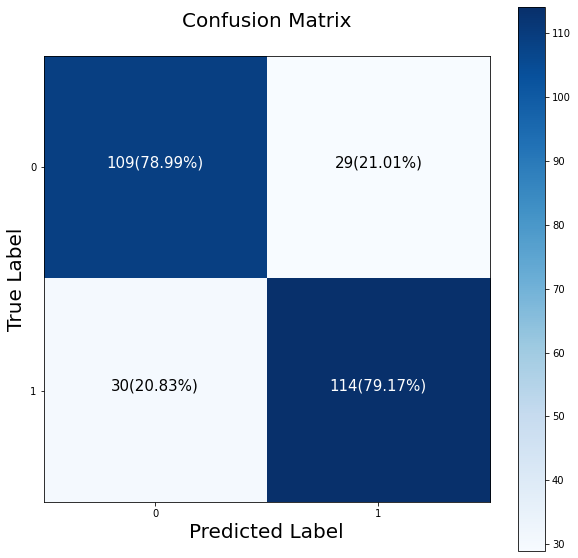

In [54]:
import itertools
#CREATE CONFUSION MATRIX
cm=confusion_matrix(y1_test,tf.round(Y_pred))
cm_norm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
n_classes=cm.shape[0]
#LET'S PRETTIFY IT
fig,ax=plt.subplots(figsize=(10,10))
#CREATE A MATRIX PLOT
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)
#CREATE CLASSES
classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#LABEL THE AXES
ax.set(title='Confusion Matrix',xlabel='Predicted Label',ylabel='True Label',
       xticks=np.arange(n_classes),yticks=np.arange(n_classes),
       xticklabels=labels, yticklabels=labels)
#SET X-AXIS LABELS TO BOTTOM
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
#ADJUST LABEL SIZE
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
#SET THRESHOLD FOR DIFFERENT COLOURS
threshold=(cm.max()+cm.min())/2
#PLOT THE TEXT ON EACH CELL
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:.2f}%)",
           horizontalalignment='center',
           color='white' if cm[i,j]>threshold else 'black',
           size=15)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.862


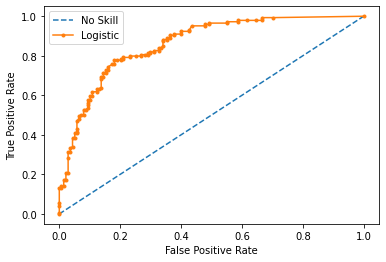

In [55]:
#ROC PLOT
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y1_test))]
# predict probabilities
lr_probs = Y_pred
# calculate scores
ns_auc = roc_auc_score(y1_test, ns_probs)
lr_auc = roc_auc_score(y1_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y1_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y1_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

##CHALLENGE 4-MULTI CLASS CLASSIFICATION
###TASK 6

In [56]:
house_df5=house_df2.copy()
house_df5=house_df5[(house_df5.GarageCars!=0)&(house_df5.GarageCars!=4)]
# house_df5=scaler.fit_transform(house_df5)
# house_df5=pd.DataFrame(house_df5,columns=house_df2.columns)
house_df5=house_df5.dropna()
print(house_df5.shape)
house_df5.head(1)

(1077, 286)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0


In [57]:
house_df5['GarageCars'].value_counts()

2    621
1    312
3    144
Name: GarageCars, dtype: int64

In [78]:
#Separate dataset into dependent and independent variables
X = house_df5[['LotArea','YearBuilt']]
y = house_df5[['GarageCars']]
X.shape,y.shape

((1077, 2), (1077, 1))

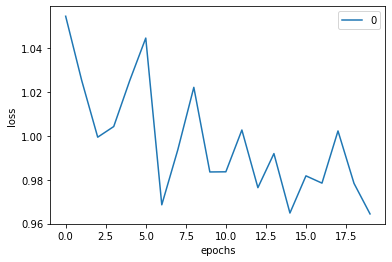

7/7 [==============================] - 0s 5ms/step - loss: 0.9962 - accuracy: 0.5787


In [85]:
#Splitting the dataset into train and test
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.2,random_state=42)
#MODEL 12
tf.random.set_seed(42)
model12=tf.keras.Sequential([tf.keras.layers.Dense(100,activation='linear'),
                            tf.keras.layers.Dense(10,activation='sigmoid'),
                        
                            tf.keras.layers.Dense(4,activation='softmax')])
#COMPILE THE MODEL
model12.compile(loss='SparseCategoricalCrossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.3),
               metrics=['accuracy'])
#FIT THE MODEL
history12=model12.fit(X1_train,y1_train,epochs=20,validation_data=(X1_test,y1_test),verbose=0)
#PLOTTING LEARNING CURVE
learning_curve(history12)
#MAKING PREDICTIONS WITH MODEL 12
y_probs=model12.predict(X1_test)
model12_loss,model12_accuracy=model12.evaluate(X1_test,y1_test)

In [86]:
#CONVERTING ALL OF THE PREDICTIONS FROM PROBAILITIES TO LABELS
y_preds=y_probs.argmax(axis=1)
#VIEW FIRST 10
y_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
X1_test['LotArea'].shape,y1_test.shape,y_preds.shape

((216,), (216, 1), (216,))

In [88]:
y1_test

,GarageCars
571,1
739,2
1297,2
790,2
1114,1
...,...
1229,1
1227,2
907,1
552,3


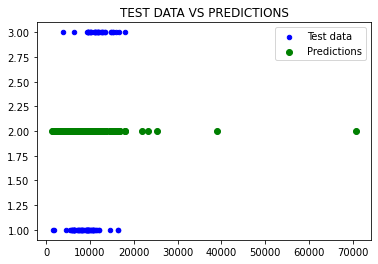

In [95]:
#PLOTTING TEST DATA VS PREDICTIONS
plot_predictions(X1_test[['LotArea']],y1_test,y_preds)
# plt.scatter(X1_test['LotArea'],y1_test)